In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import networkx as nx

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

%matplotlib inline

# Figure 3

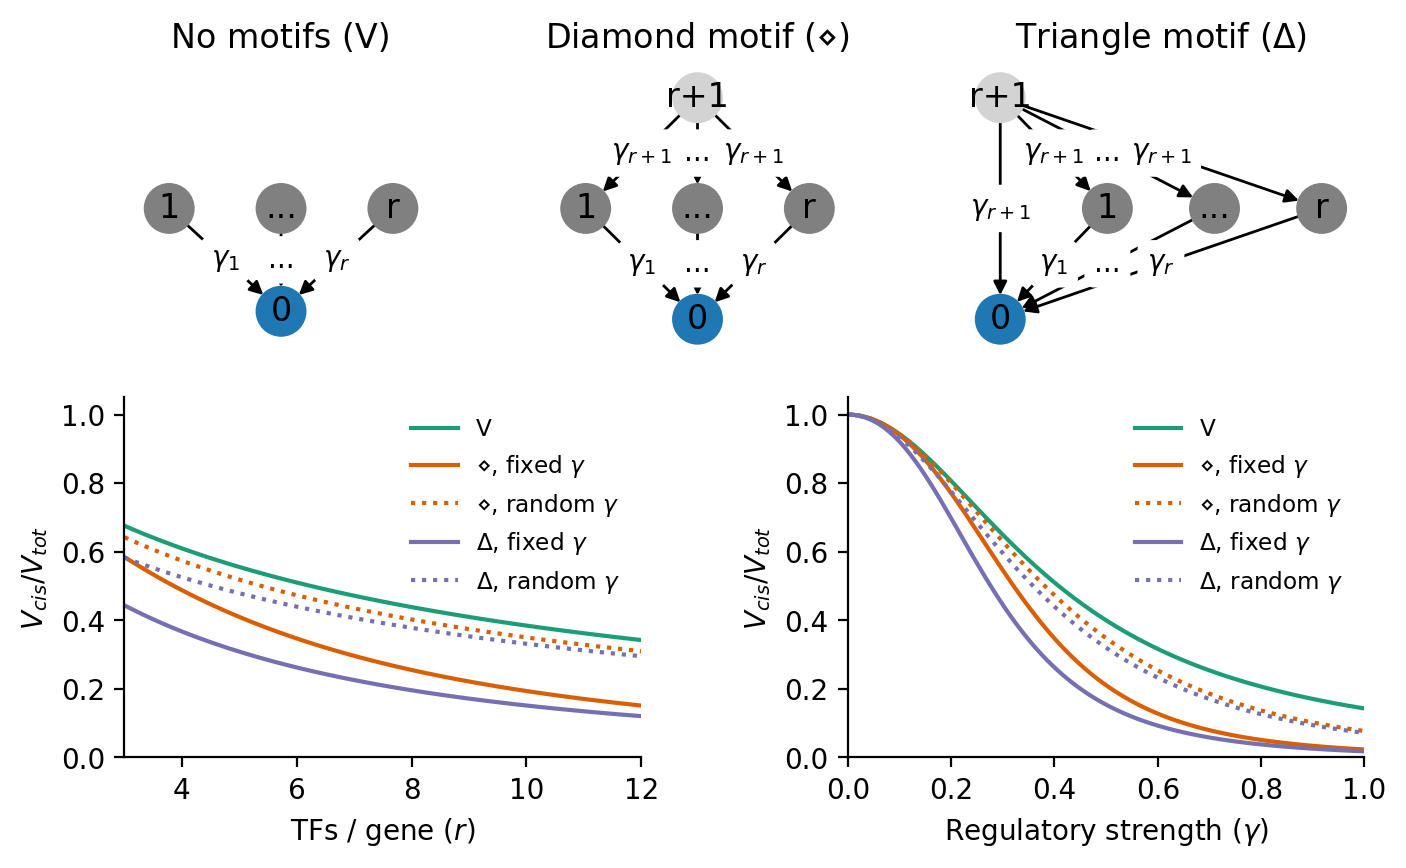

In [2]:
fig = plt.figure(figsize=(8, 4.5), dpi=200);

# Motif diagrams
#gs1 = fig.add_gridspec(nrows=3, ncols=1, height_ratios=[1, 1.1, 1.15], left=0.01, right=0.3, wspace=0.0)
gs1 = fig.add_gridspec(nrows=1, ncols=3, width_ratios=[1, 1, 1.3], bottom=0.56, wspace=0.3)


# V
ax = fig.add_subplot(gs1[0,0]) 

H=nx.from_edgelist([('1','0'), ('...','0'), ('r','0')], create_using=nx.DiGraph())
pos={'0':[0,0], '1':[-0.5,1], '...':[0,1], 'r':[0.5,1]}

nx.draw_networkx(H, 
                 pos, 
                 ax=ax, 
                 node_size=300, 
                 node_color=['grey','tab:blue','grey','grey'], 
                 with_labels=True, 
                 width=1)

nx.draw_networkx_edge_labels(H, 
                             pos, 
                             ax=ax, 
                             edge_labels={('1','0'):   r'$\gamma_{1}$', 
                                          ('...','0'):  '...',
                                          ('r','0'):   r'$\gamma_{r}$'}, 
                             rotate=0)
ax.set_xlim(-0.7, 0.7); 
ax.set_ylim(-0.4, 2.4);
ax.axis('off');
ax.set_title('No motifs (V)');


# Box
ax = fig.add_subplot(gs1[0,1])

H.add_edges_from([('r+1','1'), ('r+1','...'), ('r+1','r')])
pos={'0':[0,0], '1':[-0.5,1], '...':[0,1], 'r':[0.5,1], 'r+1':[0,2]}

nx.draw_networkx(H, 
                 pos, 
                 ax=ax, 
                 node_size=300, 
                 node_color=['grey','tab:blue','grey','grey','lightgrey'], 
                 with_labels=True, 
                 width=1)

nx.draw_networkx_edge_labels(H, 
                             pos, 
                             ax=ax, 
                             edge_labels={('1','0')     :   r'$\gamma_{1}$', 
                                          ('...','0')   :    '...',
                                          ('r','0')     :   r'$\gamma_{r}$',
                                          ('r+1','1')   :   r'$\gamma_{r+1}$', 
                                          ('r+1','...') :    '...',
                                          ('r+1','r')   :   r'$\gamma_{r+1}$',
                                         }, 
                             rotate=0)
ax.set_xlim(-0.7, 0.7); 
ax.set_ylim(-0.3, 2.3);
ax.axis('off');
ax.set_title('Diamond motif ({})'.format(r'$\diamond$'));


# Triangle
ax = fig.add_subplot(gs1[0,2])

H.add_edges_from([('r+1','0')]);
pos={'0':[0,0], '1':[0.5,1], '...':[1,1], 'r':[1.5,1], 'r+1':[0,2]}

nx.draw_networkx(H, 
                 pos, 
                 ax=ax, 
                 node_size=300, 
                 node_color=['grey','tab:blue','grey','grey','lightgrey'], 
                 with_labels=True, 
                 width=1)

nx.draw_networkx_edge_labels(H, 
                             pos, 
                             ax=ax, 
                             edge_labels={('1','0')     :   r'$\gamma_{1}$', 
                                          ('...','0')   :    '...',
                                          ('r','0')     :   r'$\gamma_{r}$',
                                          ('r+1','1')   :   r'$\gamma_{r+1}$', 
                                          ('r+1','...') :    '...',
                                          ('r+1','r')   :   r'$\gamma_{r+1}$',
                                          ('r+1','0')   :   r'$\gamma_{r+1}$',
                                         }, 
                             rotate=0)
ax.set_xlim(-0.2, 1.7); 
ax.set_ylim(-0.3, 2.3);
ax.axis('off');
ax.set_title('Triangle motif ({})'.format(r'$\Delta$'));



# Math
#gs2 = fig.add_gridspec(nrows=2, ncols=1, left=0.45, right=0.95, top=0.9, bottom=0.2, hspace=0.35)
gs2 = fig.add_gridspec(nrows=1, ncols=2, top=0.51, wspace=0.4)

# Regulators per gene
ax = fig.add_subplot(gs2[0,0])
rs = np.linspace(3, 12, 90)
gamma = 0.4

for i, (name,dr,df) in enumerate(zip(['V', r'$\diamond$', r'$\Delta$'],
                                     np.cumsum([rs*(gamma**2), rs*(gamma**4), np.ones(rs.shape)*gamma**2], axis=0),
                                     np.cumsum([rs*(gamma**2), (rs**2)*(gamma**4), gamma**2 + (2*rs)*(gamma**3)], axis=0))):
    c = plt.get_cmap('Dark2')(i)
    if i == 0:
        ax.plot(rs, 1/(1 + df), color=c, marker=None, linestyle='-', label = name);
    else:
        ax.plot(rs, 1/(1 + df), color=c, marker=None, linestyle='-', label = name + ', fixed ' + r'$\gamma$');
        ax.plot(rs, 1/(1 + dr), color=c, marker=None, linestyle=':', label = name + ', random ' + r'$\gamma$');        
        
ax.legend(fontsize='small', frameon=False, loc='upper right');
ax.set_xlabel('TFs / gene ({})'.format(r'$r$'));
ax.set_xlim(rs[0], rs[-1]);
ax.set_ylabel(r'$V_{cis}/V_{tot}$');
ax.set_ylim(0, 1.05);



# Regulatory Strength
ax = fig.add_subplot(gs2[0,1])
gammas = np.linspace(0, 1.0, 100);
r = 6

for i, (name,dr,df) in enumerate(zip(['V', r'$\diamond$', r'$\Delta$'],
                                     np.cumsum([r*(gammas**2), r*(gammas**4), np.ones(gammas.shape)*gammas**2], axis=0),
                                     np.cumsum([r*(gammas**2), (r**2)*(gammas**4), gammas**2 + (2*r)*(gammas**3)], axis=0))):
    c = plt.get_cmap('Dark2')(i)
    if i == 0:
        ax.plot(gammas, 1/(1 + df), color=c, marker=None, linestyle='-', label = name);        
    else:
        ax.plot(gammas, 1/(1 + df), color=c, marker=None, linestyle='-', label = name + ', fixed ' + r'$\gamma$');
        ax.plot(gammas, 1/(1 + dr), color=c, marker=None, linestyle=':', label = name + ', random ' + r'$\gamma$');        
        
ax.legend(fontsize='small', frameon=False, loc='upper right');
ax.set_xlabel('Regulatory strength ({})'.format(r'$\gamma$'));
ax.set_xlim(gammas[0], gammas[-1]);
ax.set_ylabel(r'$V_{cis}/V_{tot}$');
ax.set_ylim(0, 1.05);

sns.despine();